## Import and define functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_paras(group):
    run_list = np.genfromtxt("results/runs_"+group+".txt",comments=None, dtype=str)[:,0]
    paras, errors = np.empty([len(run_list), max_channel, 6]), np.empty([len(run_list), max_channel, 6])
    
    for i, run in enumerate(run_list):
        for j in range(max_channel):
            channel = j+1
            file = np.genfromtxt("data/"+run+"/Fit_Ch0"+str(channel)+".dat",comments=None)
        
            paras[i,j,0], errors[i,j,0] = file[0,1]+file[10,1], file[0,2]+file[10,2]  #pedestal
            paras[i,j,1], errors[i,j,1] = file[1,1],            file[1,2]             #scale
            paras[i,j,2], errors[i,j,2] = file[2,1],            file[2,2]             #sigma
            paras[i,j,3], errors[i,j,3] = file[3,1],            file[3,2]             #mu
            paras[i,j,4], errors[i,j,4] = file[4,1],            file[4,2]             #nu
            paras[i,j,5], errors[i,j,5] = file[11,1],           file[11,2]            #chi^2/NDF
            
    return paras, errors

## Analysis

Text(0, 0.5, '$s_{ped}$')

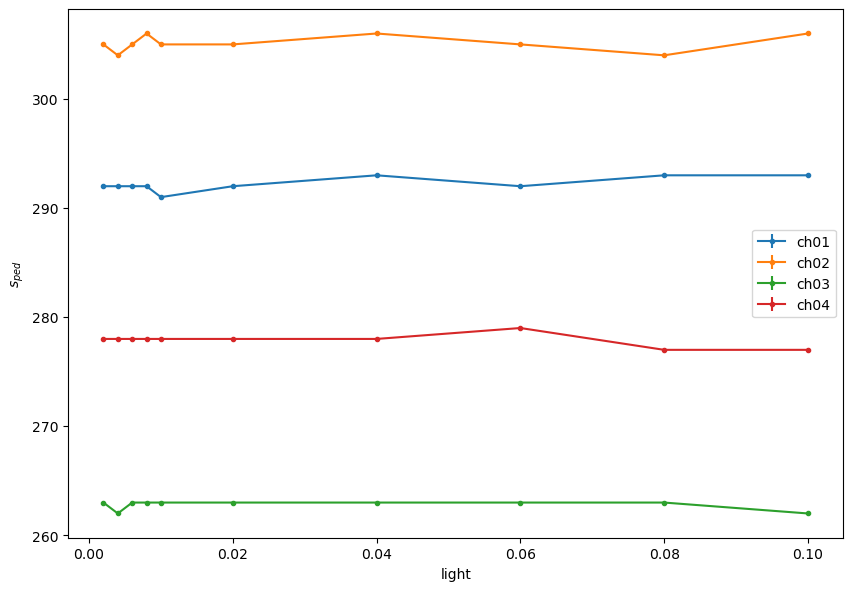

In [23]:
plt.figure(figsize=(10,7), dpi=100)


paras = np.loadtxt("results/s_linearity_1100V_off/10paras/paras_iter06.txt")
xpoints = np.loadtxt("results/s_linearity_1100V_off/runs.txt")[:,1]
for i in range(4):
    plt.errorbar(xpoints, paras[10*i:10*(i+1), 4], yerr = paras[10*i:10*(i+1), 25], label="ch0"+str(i+1), marker='.', fmt='o-')


plt.legend()
plt.xlabel('light')
plt.ylabel(r"$s_{ped}$")